In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
with open('feat_dict.pickle', 'rb') as file:
    feat_dict = pickle.load(file)

In [3]:
np.array(feat_dict['original_vib']).shape

(36200, 1, 12, 100)

In [4]:
from munkres import Munkres,print_matrix

def best_map(L1,L2):
    #L1 should be the labels and L2 should be the clustering number we got
    Label1 = np.unique(L1)       # 去除重复的元素，由小大大排列
    nClass1 = len(Label1)        # 标签的大小
    Label2 = np.unique(L2)       
    nClass2 = len(Label2)
    nClass = np.maximum(nClass1,nClass2)
    G = np.zeros((nClass,nClass))
    for i in range(nClass1):
        ind_cla1 = L1 == Label1[i]
        ind_cla1 = ind_cla1.astype(float)
        for j in range(nClass2):
            ind_cla2 = L2 == Label2[j]
            ind_cla2 = ind_cla2.astype(float)
            G[i,j] = np.sum(ind_cla2 * ind_cla1)
    m = Munkres()
    index = m.compute(-G.T)
    index = np.array(index)
    c = index[:,1]
    newL2 = np.zeros(L2.shape)
    for i in range(nClass2):
        newL2[L2 == Label2[i]] = Label1[c[i]]
    return newL2

In [5]:
from sklearn.cluster import KMeans
pred_acc = 0
pred_labels = []
for i in range(500):
    kmeans = KMeans(n_clusters=7, n_init="auto").fit(feat_dict['vib_feat'])
    kmeans_labels = best_map(feat_dict['labels'], kmeans.labels_)
    acc = (np.array(kmeans_labels) == feat_dict['labels']).sum() / len(feat_dict['labels'])
    if acc >= pred_acc:
        pred_acc = acc
        pred_labels = kmeans_labels   
pred_acc

0.8890883977900552

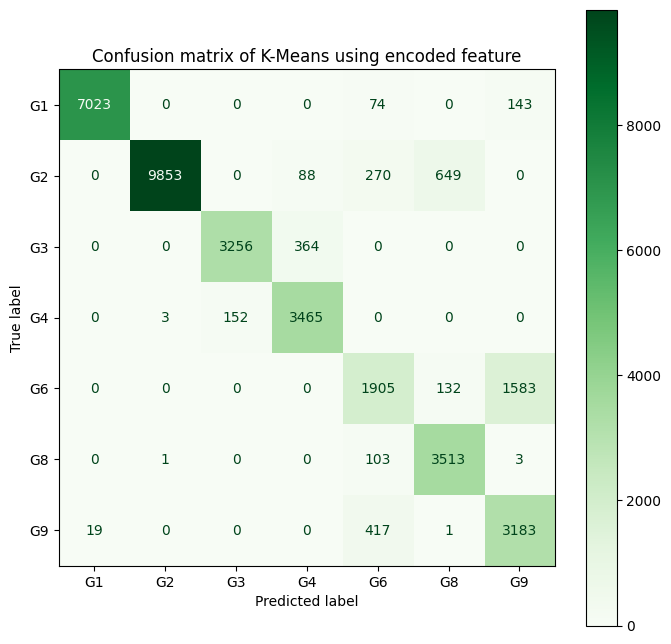

In [73]:
conf_matrix = confusion_matrix(feat_dict['labels'], pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                              display_labels=['G1', 'G2', 'G3', 'G4', 'G6', 'G8', 'G9'])

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Confusion matrix of K-Means using encoded feature')

disp.plot(
    include_values=True,
    cmap="Greens",
    ax=ax,
    xticks_rotation="horizontal",
    values_format="d"
)

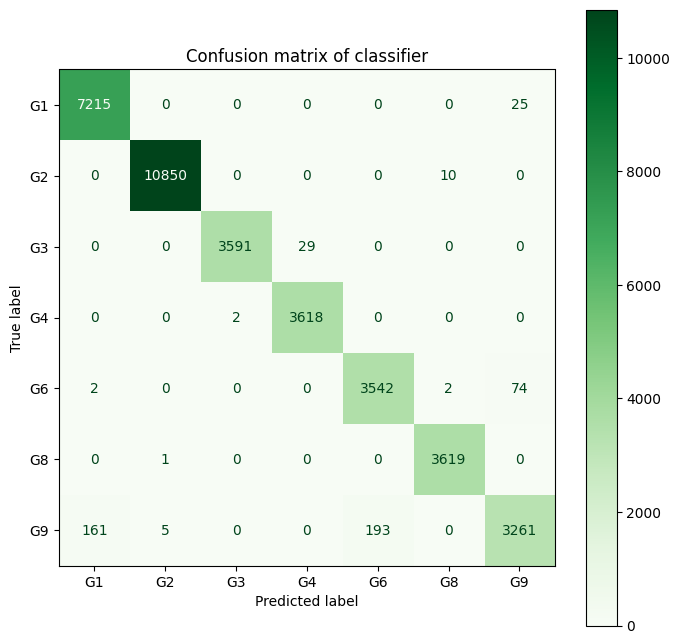

In [48]:
conf_matrix = confusion_matrix(feat_dict['labels'], feat_dict['pred_labels'])

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                              display_labels=['G1', 'G2', 'G3', 'G4', 'G6', 'G8', 'G9'])

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Confusion matrix of classifier')

disp.plot(
    include_values=True,
    cmap="Greens",
    ax=ax,
    xticks_rotation="horizontal",
    values_format="d"
)

True label:  1


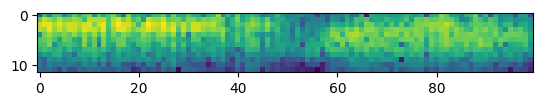

In [5]:
index = np.random.randint(0, len(feat_dict['labels']))
print('True label: ', feat_dict['labels'][index])
plt.imshow(feat_dict['original_vib'][index].squeeze())

Predicted label:  1


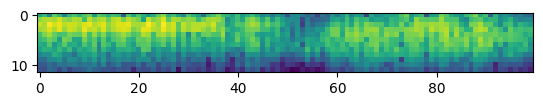

In [6]:
print('Predicted label: ', feat_dict['pred_labels'][index])
plt.imshow(feat_dict['decoded_vib'][index].squeeze())

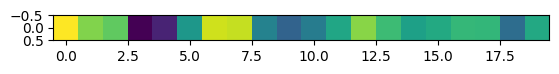

In [7]:
plt.imshow(np.expand_dims(feat_dict['vib_feat'][index], axis=0))

([<matplotlib.axis.YTick at 0x12fc49030>,
 [Text(0, 0, '0'), Text(0, 12, '12')])

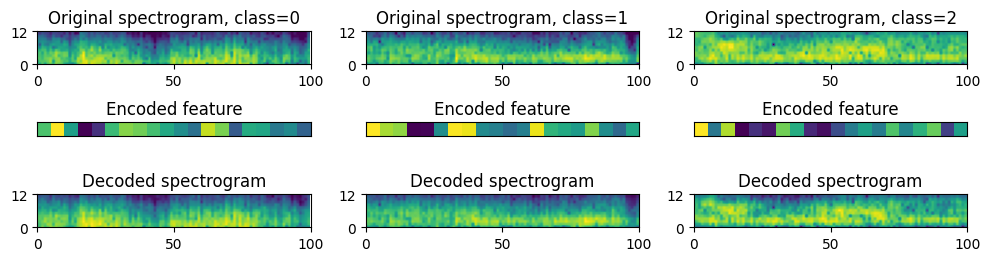

In [8]:
index = np.random.randint(0, len(feat_dict['labels']), size=3)

plt.figure(figsize=(12, 3))
fig.tight_layout()

plt.subplot(3, 3, 1)
plt.title('Original spectrogram, class=' + str(feat_dict['labels'][index[0]]))
plt.imshow(feat_dict['original_vib'][index[0]].squeeze())
plt.ylim((0, 12))
plt.xlim((0, 100))
plt.xticks([i for i in range(0, 150, 50)])
plt.yticks([0, 12])

plt.subplot(3, 3, 2)
plt.title('Original spectrogram, class=' + str(feat_dict['labels'][index[1]]))
plt.imshow(feat_dict['original_vib'][index[1]].squeeze())
plt.ylim((0, 12))
plt.xlim((0, 100))
plt.xticks([i for i in range(0, 150, 50)])
plt.yticks([0, 12])

plt.subplot(3, 3, 3)
plt.title('Original spectrogram, class=' + str(feat_dict['labels'][index[2]]))
plt.imshow(feat_dict['original_vib'][index[2]].squeeze())
plt.ylim((0, 12))
plt.xlim((0, 100))
plt.xticks([i for i in range(0, 150, 50)])
plt.yticks([0, 12])

plt.subplot(3, 3, 4)
plt.title('Encoded feature')
plt.imshow(np.expand_dims(feat_dict['vib_feat'][index[0]], axis=0))
plt.yticks([])
plt.xticks([])

plt.subplot(3, 3, 5)
plt.title('Encoded feature')
plt.imshow(np.expand_dims(feat_dict['vib_feat'][index[1]], axis=0))
plt.yticks([])
plt.xticks([])

plt.subplot(3, 3, 6)
plt.title('Encoded feature')
plt.imshow(np.expand_dims(feat_dict['vib_feat'][index[2]], axis=0))
plt.yticks([])
plt.xticks([])

plt.subplot(3, 3, 7)
plt.title('Decoded spectrogram')
plt.imshow(feat_dict['decoded_vib'][index[0]].squeeze())
plt.ylim((0, 12))
plt.xlim((0, 100))
plt.xticks([i for i in range(0, 150, 50)])
plt.yticks([0, 12])

plt.subplot(3, 3, 8)
plt.title('Decoded spectrogram')
plt.imshow(feat_dict['decoded_vib'][index[1]].squeeze())
plt.ylim((0, 12))
plt.xlim((0, 100))
plt.xticks([i for i in range(0, 150, 50)])
plt.yticks([0, 12])

plt.subplot(3, 3, 9)
plt.title('Decoded spectrogram')
plt.imshow(feat_dict['decoded_vib'][index[2]].squeeze())
plt.ylim((0, 12))
plt.xlim((0, 100))
plt.xticks([i for i in range(0, 150, 50)])
plt.yticks([0, 12])

In [6]:
tsne = TSNE(n_components=2, init='pca')
X = np.array(feat_dict['vib_feat'])
X_tsne = tsne.fit_transform(X)

Org data dimension is 20. Embedded data dimension is 2


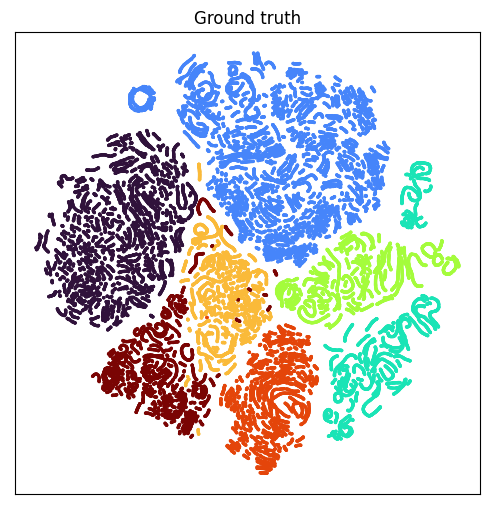

In [8]:
print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(6, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], s=2, c=feat_dict['labels'], cmap='turbo')
plt.title('Ground truth')
plt.xticks([])
plt.yticks([])
plt.show()

Org data dimension is 20. Embedded data dimension is 2


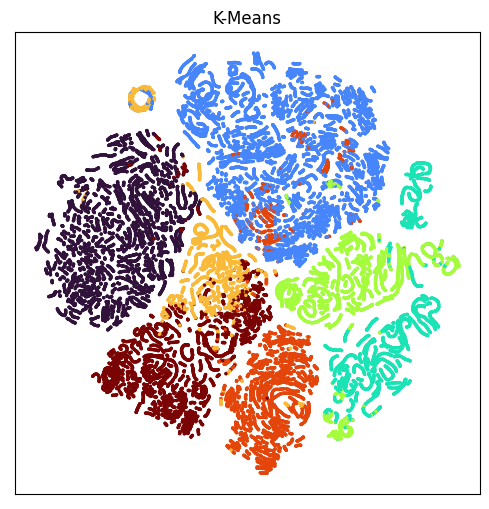

In [7]:
print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(6, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], s=2, c=pred_labels, cmap='turbo')
plt.title('K-Means')
plt.xticks([])
plt.yticks([])
plt.show()